In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
bbox = (-0.5,51.3,-0.25,51.5)

df = gpd.read_parquet(
    "s3://weave.energy/smart-meter", 
    bbox=bbox,
    filters=[("data_collection_log_timestamp", "==", pd.Timestamp("2024-07-14T20:00:00Z"))])

print("Number of rows: ", len(df))
df.head()


Number of rows:  2362


,dataset_id,dno_alias,aggregated_device_count_active,total_consumption_active_import,data_collection_log_timestamp,geometry,secondary_substation_unique_id,lv_feeder_unique_id
0,190900228502,SSEN,8.0,970.0,2024-07-14 20:00:00+00:00,POINT (-0.49027 51.48141),SSEN-1909002285,SSEN-190900228502
1,190900228503,SSEN,5.0,689.0,2024-07-14 20:00:00+00:00,POINT (-0.49027 51.48141),SSEN-1909002285,SSEN-190900228503
2,190900228504,SSEN,21.0,3281.0,2024-07-14 20:00:00+00:00,POINT (-0.49027 51.48141),SSEN-1909002285,SSEN-190900228504
3,190900626001,SSEN,13.0,3553.0,2024-07-14 20:00:00+00:00,POINT (-0.48837 51.45686),SSEN-1909006260,SSEN-190900626001
4,190900628002,SSEN,10.0,2743.0,2024-07-14 20:00:00+00:00,POINT (-0.48219 51.457),SSEN-1909006280,SSEN-190900628002


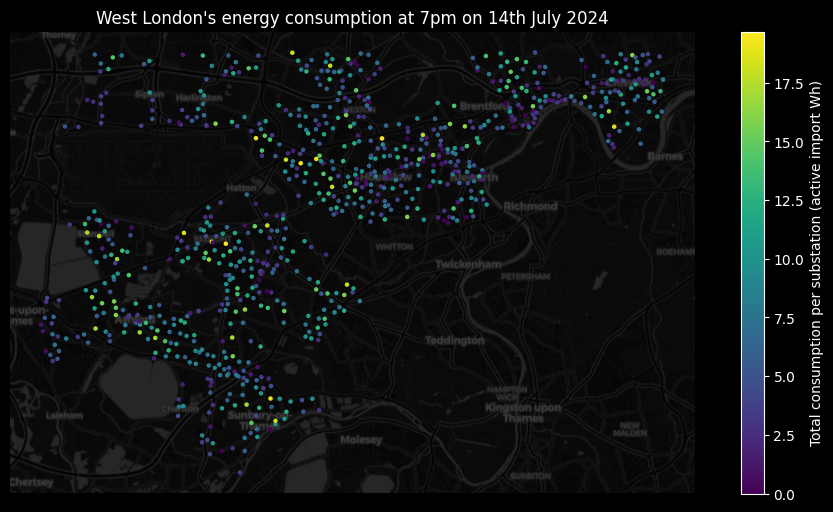

In [3]:
substations = df.groupby(["secondary_substation_unique_id", "geometry"], as_index=False).sum("total_consumption_active_import").set_geometry("geometry", crs=4326)
substations = substations[substations["total_consumption_active_import"] < 20000]
# Turn Wh consumption into kWh
substations["total_consumption_active_import"] /= 1000
ax = substations.plot(kind="geo", column="total_consumption_active_import", markersize=5, legend=True, legend_kwds={"label": "Total consumption per substation (active import Wh)"}, figsize=(12, 6))
ax.set_title("West London's energy consumption at 7pm on 14th July 2024")
ax.set_axis_off()
ax.set_facecolor("#1B2526")
cx.add_basemap(ax, crs=4326, source=cx.providers.CartoDB.DarkMatter, attribution=False)
#plt.savefig("../etc/figures/southampton_consumption_7pm_july_14_2024.png")
plt.show()

In [7]:
#numebr of substations
print(len(substations))

#dump all the substations to a text file
with open("substations.txt", "w") as f:
    f.write(substations["secondary_substation_unique_id"].to_string())

from shapely import wkt

def extract_coordinates(point):
    return point.x, point.y

df['longitude'], df['latitude'] = zip(*df['geometry'].apply(extract_coordinates))
locations_df = df[['secondary_substation_unique_id', 'latitude', 'longitude']]

locations_df.to_csv('substation_locations.csv', index=False)



832


In [5]:
type(substations["geometry"][0])


shapely.geometry.point.Point

394    SSEN-2804604160
331    SSEN-2803007080
724    SSEN-2818009140
550    SSEN-2811016090
201    SSEN-2529001460
171    SSEN-2526009060
4      SSEN-1909006320
474    SSEN-2808001080
200    SSEN-2529001440
73     SSEN-2511006200
228    SSEN-2529009250
415    SSEN-2807001020
801    SSEN-2822010160
374    SSEN-2803020020
447    SSEN-2807004040
735    SSEN-2822002010
565    SSEN-2812002500
260    SSEN-2529017190
782    SSEN-2822008248
678    SSEN-2818004060
480    SSEN-2808001285
239    SSEN-2529011300
610    SSEN-2816006030
589    SSEN-2813006020
572    SSEN-2812003180
796    SSEN-2822009280
524    SSEN-2809612006
62     SSEN-2511005140
504    SSEN-2809601050
53     SSEN-2508023085
37     SSEN-2504601180
714    SSEN-2818007300
141    SSEN-2512012020
742    SSEN-2822004097
96     SSEN-2511011160
125    SSEN-2512007035
384    SSEN-2803022170
235    SSEN-2529009330
582    SSEN-2813001200
101    SSEN-2511012100
462    SSEN-2807006030
359    SSEN-2803012420
561    SSEN-2812002340
258    SSEN

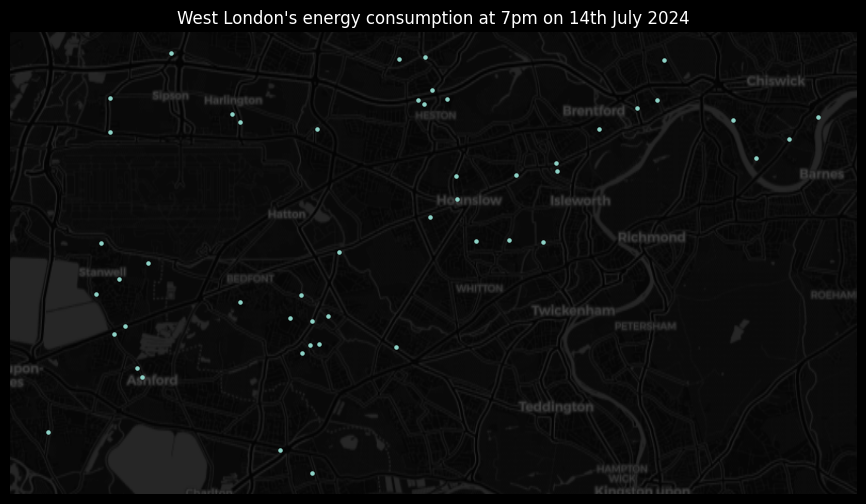

In [36]:
#sample 50 random substations
substations_sample = substations.sample(50)
print(substations_sample["secondary_substation_unique_id"])
#push the substations_sample to a text file
with open("substations_sample.txt", "w") as f:
    f.write(substations_sample["secondary_substation_unique_id"].to_string())

#plot the substations
ax = substations_sample.plot(kind="geo", markersize=5, legend=True, legend_kwds={"label": "Total consumption per substation (active import Wh)"}, figsize=(12, 6))
ax.set_title("West London's energy consumption at 7pm on 14th July 2024")
ax.set_axis_off()
ax.set_facecolor("#1B2526")
cx.add_basemap(ax, crs=4326, source=cx.providers.CartoDB.DarkMatter, attribution=False)
#plt.savefig("../etc/figures/southampton_consumption_7pm_july_14_2024.png")
plt.show()
